# Constraint

In [1]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

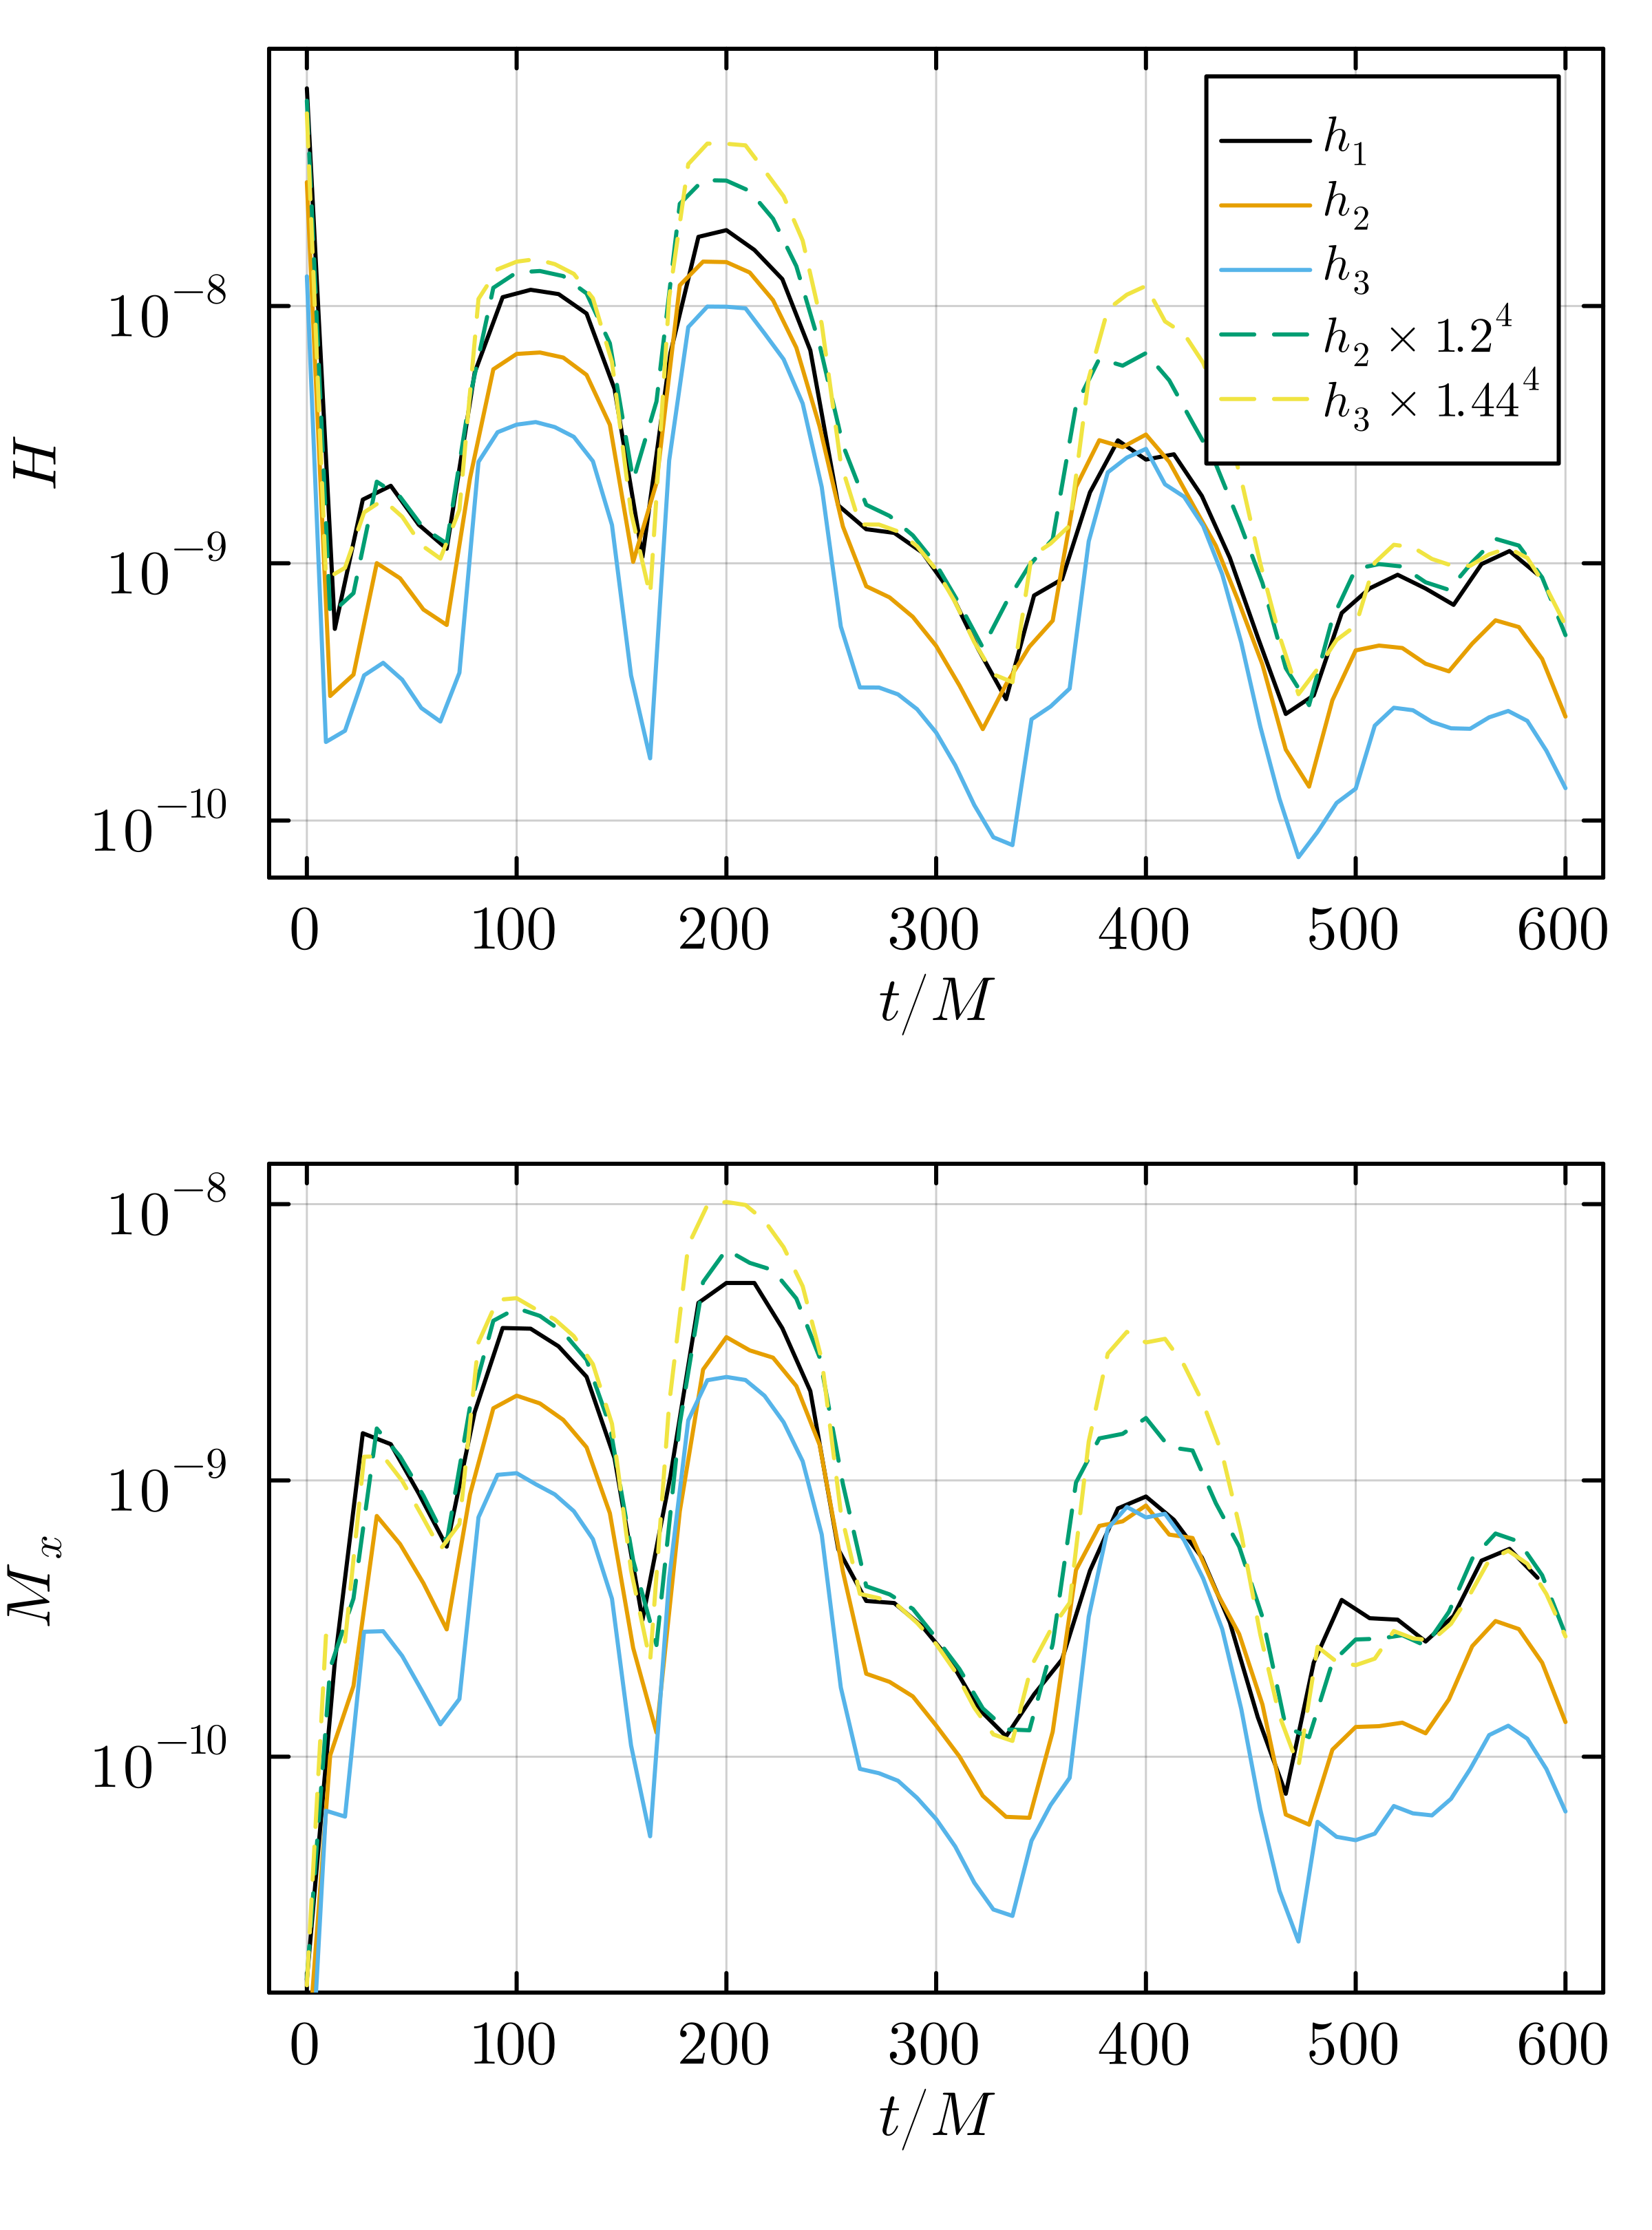

In [28]:
let dirs, plt, plts
    # convergence order
    conv_order = 4
    conv_bases = [1, 1.2, 1.44]

    # plots
    plts = []
    dirss = [
        [
            ("q1-Z4cow-low/Sum/admconstraints-hc.tsv", "low"),
            ("q1-Z4cow-med/Sum/admconstraints-hc.tsv", "med"),
            ("q1-Z4cow-high/Sum/admconstraints-hc.tsv", "high"),
        ],
        [
            ("q1-Z4cow-low/Sum/admconstraints-mc.tsv", "low"),
            ("q1-Z4cow-med/Sum/admconstraints-mc.tsv", "med"),
            ("q1-Z4cow-high/Sum/admconstraints-mc.tsv", "high"),
        ],
    ]
    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_0d(dirs; cols=[2,10], parent_dir="../../data/q1-constraints")
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = 0:100:600
        xticks!(plt, xs, [L"%$(n)" for n in xs])
        ys = [1e-10, 1e-9, 1e-8]
        yticks!(plt, ys, [L"10^{%$(Int(log10(p)))}" for p in ys])
        
        labs = [L"h_1", L"h_2", L"h_3"]
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], label=lab)
        end
        
        scalelabs = [L"h_2\times 1.2^4", L"h_3\times 1.44^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * conv_bases[i+1]^conv_order, label=lab, linestyle=:dash)
        end
        plt = plot!(framestyle=:box, yscale=:log)
        if j == 1
            plt = plot!(ylabel = L"H", xlabel=L"t/M", ylim=(6e-11, 1e-7))
        else
            plt = plot!(ylabel = L"M_x", xlabel=L"t/M", ylim=(1.4e-11, 1.4e-8))
        end
        #display(plt1)
        push!(plts, plt)
    end
    
    plt_grid = plot(plts..., layout=(2, 1), size = (400, 540), dpi=600)
    # savefig(plt_grid, "Constraints-conv.pdf")
    display(plt_grid)
end